In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from divopt.evaluation.process_results import load_results_dir

In [3]:
limit_names = ["samples", "time"]
results_dict = {}
for limit_name in limit_names:
    dirname = f"../runs/best_variance_{limit_name}/"
    results = load_results_dir(dirname)
    results_dict[limit_name] = results

In [4]:
from functools import lru_cache


@lru_cache(maxsize=1000)
def get_times(results_fname):
    df = pd.read_csv(results_fname)
    n_generated = len(df)
    df_unique = df.drop_duplicates(subset=["CanSmiles"])
    n_unique_generated = len(df_unique)

    total_gen_time = df["Generation time [s]"].iloc[-1]
    total_score_time = df["Scoring time [s]"].iloc[-1]
    total_memory_time = df["Memory time [s]"].iloc[-1]

    gen_mols_per_second = n_generated / total_gen_time
    gen_unique_per_second = n_unique_generated / total_gen_time
    score_mols_per_second = n_unique_generated / total_score_time

    # calculate fraction of time spent on scoring, gen, memory
    total_time = total_gen_time + total_score_time + total_memory_time
    gen_frac = total_gen_time / total_time * 100
    score_frac = total_score_time / total_time * 100
    memory_frac = total_memory_time / total_time * 100

    return {
        "Generation [mols/s]": gen_mols_per_second,
        "Generation [unique mols/s]": gen_unique_per_second,
        "Scoring [mols/s]": score_mols_per_second,
        "Generation [%]": gen_frac,
        "Memory [%]": memory_frac,
        "Scoring [%]": score_frac,
    }

In [5]:
times_dict = {}
for limit_name, results in results_dict.items():
    times = [get_times(results_fname) for results_fname in results["results_fname"]]
    results_times = pd.concat([results, pd.DataFrame(times)], axis=1)
    time_columns = results_times.columns[-6:]
    vs_idx = pd.Series([s.startswith("VS") for s in results_times["optimizer_name"]])
    results_times = results_times.loc[~vs_idx]
    times_dict[limit_name] = results_times

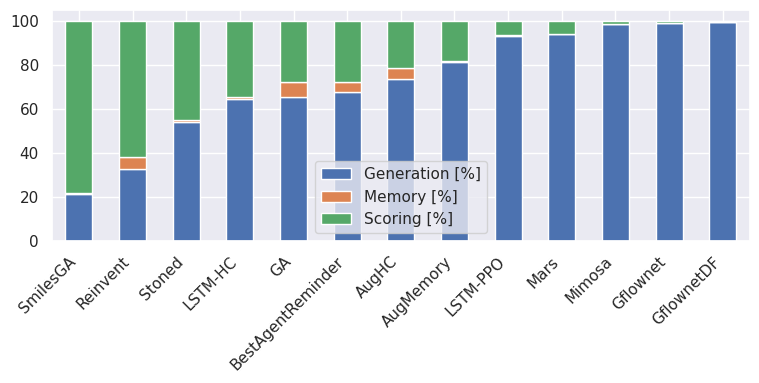

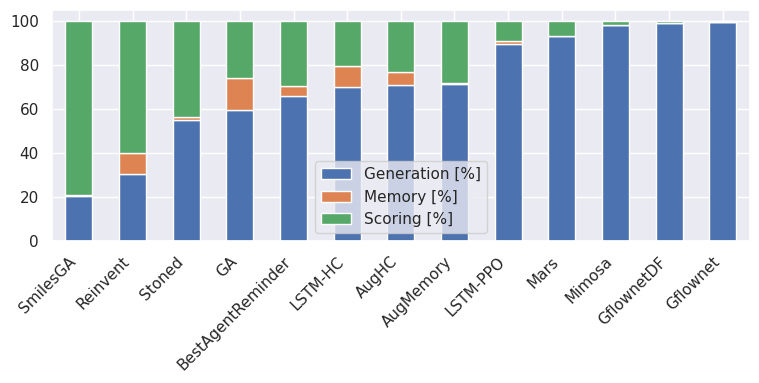

In [6]:
# bar plot showing the percentage of time spent on scoring, generation, memory
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(10, 4))

for limit_name, results_times in times_dict.items():
    results_times_grouped = results_times.groupby("optimizer_name")[time_columns].mean()
    perc_cols = results_times_grouped.columns[3:].tolist()
    df_perc = results_times_grouped[perc_cols]
    df_perc = df_perc.sort_values(by="Generation [%]", inplace=False)
    # make a stacked bar plot using seaborn
    df_perc.plot(kind="bar", stacked=True, figsize=(9, 3), ax=plt.gca())

    plt.xticks(rotation=45, ha="right")
    plt.xlabel("")
    plt.savefig("figures/timings.pdf", bbox_inches="tight")
    plt.show()

In [7]:
results_times[results_times["optimizer_name"] == "GA"]

,Task,Optimizer,Memory,n_molecules_total,valid_fraction,n_molecules_unique,n_solutions_time,n_diverse_all_time,n_diverse_novel_time,n_solutions_samples,...,results_fname,n_molecules_valid,IntDiv_time,IntDiv_samples,Generation [mols/s],Generation [unique mols/s],Scoring [mols/s],Generation [%],Memory [%],Scoring [%]
15,DRD2,GraphGA,Div,205765,1.0,84521,1113,101,55,1113,...,../runs/best_variance_time/DRD2_GA_2_1/results...,205765,0.775192,0.770327,504.294457,207.146365,533.106805,68.071797,5.477921,26.450282
16,DRD2,GraphGA,Div,206645,1.0,84876,1473,109,46,1473,...,../runs/best_variance_time/DRD2_GA_2_0/results...,206645,0.800059,0.762229,502.282146,206.304045,559.110810,68.743727,5.890802,25.365471
17,DRD2,GraphGA,Div,207105,1.0,89540,1238,93,43,1238,...,../runs/best_variance_time/DRD2_GA_2_3/results...,207105,0.780091,0.757145,525.425621,227.163082,544.070831,65.738294,6.814336,27.447370
18,DRD2,GraphGA,Div,207992,1.0,87484,690,141,67,690,...,../runs/best_variance_time/DRD2_GA_2_2/results...,207992,0.760962,0.778838,520.062433,218.744672,529.639875,66.886551,5.488874,27.624575
19,DRD2,GraphGA,Div,213379,1.0,90339,840,66,41,840,...,../runs/best_variance_time/DRD2_GA_2_4/results...,213379,0.780973,0.746761,527.901842,223.499616,540.984616,67.333169,4.849150,27.817681
80,GSK3β,GraphGA,Div,206705,1.0,91612,2338,793,723,2338,...,../runs/best_variance_time/GSK3_GA_5_0/results...,206705,0.850544,0.844450,820.013920,363.431534,614.798174,41.963355,33.230445,24.806200
81,GSK3β,GraphGA,Div,207727,1.0,91715,3482,805,728,3482,...,../runs/best_variance_time/GSK3_GA_5_2/results...,207727,0.844199,0.835845,844.547278,372.881973,594.846141,40.857323,33.531080,25.611597
82,GSK3β,GraphGA,Div,208101,1.0,94033,2844,826,736,2844,...,../runs/best_variance_time/GSK3_GA_5_3/results...,208101,0.850911,0.839435,856.940660,387.219192,603.313346,40.543182,33.435352,26.021467
83,GSK3β,GraphGA,Div,210146,1.0,92040,2789,810,747,2789,...,../runs/best_variance_time/GSK3_GA_5_4/results...,210146,0.842255,0.846362,791.966111,346.866278,597.632545,44.106159,30.294600,25.599241
84,GSK3β,GraphGA,Div,210617,1.0,93201,2916,635,561,2916,...,../runs/best_variance_time/GSK3_GA_5_1/results...,210617,0.851412,0.843257,792.618217,350.744766,591.258664,44.109260,29.724371,26.166369


In [8]:
results_times_grouped

,Generation [mols/s],Generation [unique mols/s],Scoring [mols/s],Generation [%],Memory [%],Scoring [%]
optimizer_name,,,,,,
AugHC,125.407353,98.330456,306.801749,70.768671,6.003812,23.227517
AugMemory,53.886385,35.487423,89.059973,71.219935,0.784433,27.995632
BestAgentReminder,145.410187,125.179939,296.427923,65.726282,4.806479,29.467238
GA,603.856826,261.354660,560.594047,59.424497,14.449635,26.125868
Gflownet,20.742315,20.113111,2939.464981,99.319158,0.000594,0.680248
GflownetDF,20.630060,20.182482,2568.585111,99.117367,0.015368,0.867265
LSTM-HC,185.817638,185.817638,646.659572,69.936814,9.451709,20.611478
LSTM-PPO,129.998487,117.472862,1267.026597,89.340636,1.625267,9.034097
Mars,19.089493,9.726859,139.221713,92.997156,0.018622,6.984222


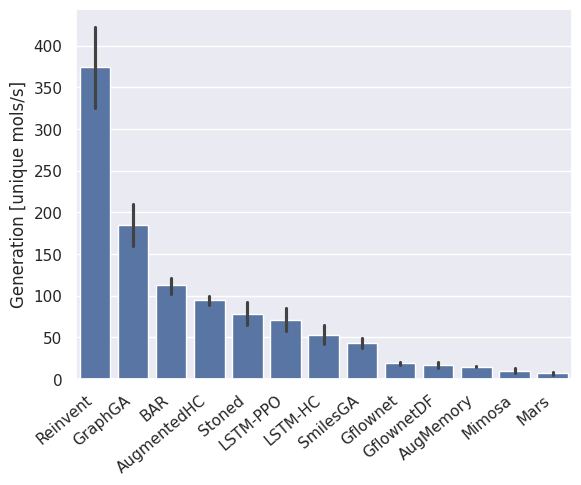

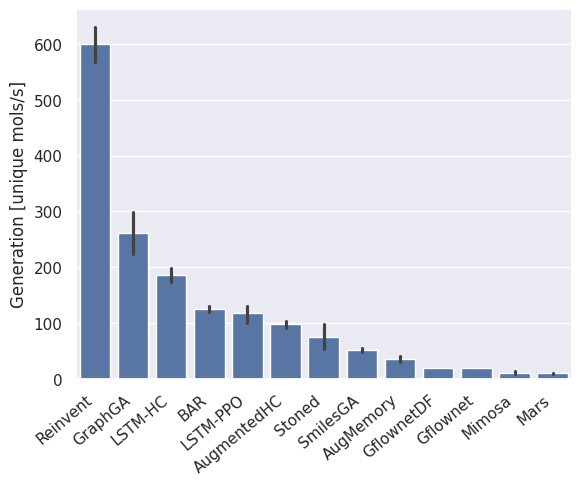

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# create bar plots with Generation [mols/s]	Generation [unique mols/s]
for limit_name, results_times in times_dict.items():
    y_name = "Generation [unique mols/s]"
    results_times_grouped = results_times.groupby("Optimizer")[time_columns].mean()
    ranked_optimizers = results_times_grouped.sort_values(by=y_name, ascending=False).index.tolist()
    sns.barplot(data=results_times, x="Optimizer", y=y_name, order=ranked_optimizers)
    # rotate x labels
    plt.xticks(rotation=40, horizontalalignment="right")
    plt.yscale("linear")
    plt.xlabel("")
    plt.show()